In [1]:
import squidpy as sq
import scanpy as sc
import pandas as pd 
import os 

In [2]:
import numpy as np 

In [3]:
import CellNeighborEX
print('Version:', CellNeighborEX.__version__)

Version: 0.0.5


In [5]:
spdatapath='./inputQuery/'
#ad_spatial_ori=sc.read_h5ad(spdatapath+'common_counts_sp.h5ad')
adata=sc.read_h5ad('inputQuery/spatial_liver.h5ad')
'''
coordinate = pd.read_csv(spdatapath+'tissue_positions_list.csv')
coordinate=coordinate.to_numpy()

print(coordinate.shape,ad_spatial_ori)

df=pd.read_csv(spdatapath+'MNN_based_annotations/3_nico_annotation_ct_name.csv')
sc_ctype_name=df.to_numpy()

df=pd.read_csv(spdatapath+'MNN_based_annotations/3_nico_annotation_cluster.csv')
nico_cluster=df.to_numpy()
cellname=nico_cluster[:,0]

print("equal",np.array_equal(cellname,ad_spatial_ori.obs_names))


d={}
for i in range(len(sc_ctype_name)):
    d[i]=sc_ctype_name[i][1]

ctname=[]
for i in range(len(cellname)):
        ctname.append( d[ nico_cluster[i,1]])

ad_spatial_ori.obs['nico_ct']=ctname

sc_ctype_name=coordinate[:,0]
d={}
for i in range(len(sc_ctype_name)):
    d[sc_ctype_name[i]]=i

index=[]
for i in range(len(cellname)):
    index.append( d[ cellname[i]])

coordinate1=coordinate[index]
print("equal",np.array_equal(cellname,coordinate1[:,0]),coordinate1.shape)

#because it is 2d tissue slide so only upload the X and Y coordiante
ad_spatial_ori.obsm['spatial']=coordinate1[:,[1,2]].astype(float)
adata=ad_spatial_ori
sample=[]
for i in range(len(ad_spatial_ori.obs_names)):
    sample.append('batch0')


adata.obs['sample']=np.array(sample)
adata.obs['sample']=pd.Categorical(adata.obs['sample'])
'''
print('1',adata)

index=[]
for i in range(len(adata.obs_names)):
    flag=1
    if adata.obs['nico_ct'][i]=='NM':
        flag=0
    if adata.obs['nico_ct'][i]=='HsPCs':
        flag=0
    if adata.obs['nico_ct'][i]=='Basophils':
        flag=0
    if adata.obs['nico_ct'][i]=='NK cells':
        flag=0
    if flag==1:
        index.append(i)


adata=adata[index]
print('2',adata)

1 AnnData object with n_obs × n_vars = 391678 × 342
    obs: 'n_counts', 'cluster_id', 'nico_ct', 'x', 'y'
    obsm: 'spatial'
2 View of AnnData object with n_obs × n_vars = 374905 × 342
    obs: 'n_counts', 'cluster_id', 'nico_ct', 'x', 'y'
    obsm: 'spatial'


In [6]:
# Create a dataframe from the provided AnnData object.
# coord_key (str): Key to access the spatial coordinates in `adata.obsm`.
# celltype_key (str): Key to access the cell type information in `adata.obs`.
df =  CellNeighborEX.neighbors.create_dataframe(adata, coord_key='spatial', celltype_key='nico_ct')



In [8]:
import pickle 


In [7]:
# (Optional) Calculate the closest distance between cells.
# If save=True, the result (closest_distance_distribution.pdf) is saved in the "neighbor_info" folder in the root directory.
#closest_distances = CellNeighborEX.neighbors.calculate_closest_distance(df, save=True)

In [9]:
'''
fout='save_closest_dist.p'
myfile=open(fout,'wb')
pickle.dump(closest_distances,myfile)
myfile.close()
'''

In [9]:
fout='save_closest_dist.p'
myfile=open(fout,'rb')
closest_distances=pickle.load(myfile)
myfile.close()

In [10]:
# Find immediate neighbors using Delaunay triangulation and retrieve the spatial connectivity matrix.
matrix = CellNeighborEX.neighbors.detect_neighbors(adata, coord_key='spatial', type='generic', knn=None, radius_value=None, delaunay=True)

# Calculate the number of neighbors for each cell.
neiNum = CellNeighborEX.neighbors.get_neighbors(matrix)

In [11]:
# Processes the dataframe by adding additional columns based on the neighbor matrix and neighbor counts.
# If save=True, the result (df_processed.csv) is saved in the "neighbor_info" folder in the root directory.
df_processed = CellNeighborEX.neighbors.process_dataframe(df, matrix, neiNum, save=True)

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/neighbors.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['celltype2'][i] = get_neighboring_cell_type(neiType=df['neiType'][i], celltype1=df['celltype1'][i])
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/neighbors.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['celltype2'][i] = df['celltype1'][i]
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/neighbors.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [12]:
df_processed.head(5) # celltype1 is the cell type of a centered cell, and celltype2 is its neighboring cell type. 
#first_type and second_type are numbers correspond to the cell types.

,barcode,first_type,second_type,celltype1,celltype2,x,y,prop1,prop2
0,cell4,5,7,Hep-MC,Hep-P2,4787.607399,9522.299180,1.0,0.0
1,cell11,5,10,Hep-MC,LSECs,4723.227019,9442.600819,1.0,0.0
2,cell13,10,5,LSECs,Hep-MC,4715.228618,9435.840632,1.0,0.0
3,cell26,6,6,Hep-P1,Hep-P1,4628.117862,9452.246645,1.0,0.0
4,cell29,5,10,Hep-MC,LSECs,4713.215947,9446.161542,1.0,0.0


In [ ]:
###### before above I ran it ##############

In [13]:
# All categorzied files (index_, matchComb_, neiCombUnique_, prop_ .csv) are saved in the "categorized_data folder" in the root directory.
CellNeighborEX.categorization.generate_input_files(data_type = "Image", df = df_processed, sample_size=30, min_sample_size=1)



/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/categorization.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['integrated'][idx] = df['celltype1'][idx] + '+' + df['celltype2'][idx]
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/categorization.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index_boolean'][list_index1[yy]] = 1
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/categorization.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [14]:
# Normalize gene expression data.
barcodes = df_processed['barcode'].tolist()
adata = adata[barcodes, :]
sc.pp.normalize_total(adata, target_sum=1e4) # normlization
sc.pp.log1p(adata) # log-transform

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [15]:
# Save the data into dataframes.
df_cell_id = pd.DataFrame(adata.obs.index)
df_gene_name = pd.DataFrame(adata.var.index)
df_log_data = adata.T.to_df()
df_log_data = df_log_data.reset_index(drop=True) # row indices are represented as numbers.

In [16]:
df_log_data.head(5)

,cell4,cell11,cell13,cell26,cell29,cell41,cell57,cell65,cell68,cell83,...,cell394963,cell395056,cell395058,cell395069,cell395098,cell395109,cell395135,cell395179,cell395194,cell395206
0,5.563133,4.907704,3.359603,3.312549,0.000000,4.702208,4.953913,5.465077,4.476842,4.569972,...,4.227819,3.532886,4.590675,4.270931,4.883317,3.896534,4.151040,3.733287,4.251408,4.933575
1,5.013887,5.012325,0.000000,3.312549,4.997610,3.839364,4.687818,0.000000,3.644590,0.000000,...,4.913648,4.611826,4.992753,4.914815,4.535102,4.399201,4.731803,4.920378,5.159115,4.187871
2,4.472165,5.597150,3.359603,6.802918,6.378826,6.017286,6.104837,0.000000,6.679638,7.199365,...,5.603116,5.903858,6.287087,6.777043,7.317116,5.871266,6.883462,6.980848,7.551772,7.308741
3,4.558224,4.790844,3.359603,4.671146,5.687374,3.839364,5.115373,0.000000,4.144908,0.000000,...,4.227819,4.211315,0.000000,4.914815,4.365261,5.614266,4.151040,4.566825,4.652113,4.588264
4,0.000000,3.823762,4.035223,3.987317,0.000000,3.621583,3.925312,0.000000,3.644590,0.000000,...,5.316661,4.211315,0.000000,3.872426,3.799735,2.837743,3.650658,2.681394,0.000000,2.846106


In [17]:
# The length of df_processed must be the same as the length of df_cell_id.
print(len(df_cell_id))
print(len(df_processed))

31867
31867


In [18]:
# Set argument values for CellNeighborEX.DEanalysis.analyze_data().
data_type = "Image"  # Image: image-based ST data, NGS: NGS-based ST data
lrCutoff = 0.4 # log ratio
pCutoff = 0.01 # p-value
pCutoff2 = 0.05 # false discovery rate
direction = 'up' # up: up-reguated genes, down: down-regulated genes
normality_test = False # True: depending on the result of the normality test, the statistical test is determined. If the data is normal, the parametric test is used. Otherwise, the non-parametric test is used.
                       # False: when sample size (number of cells/spots) is larger than 30, the parameteric test is used. Otherwise, the non-parametric test is used.
top_genes = 10 # Top 10 DEGs are annotated in the volcano plot.

In [19]:
path_categorization= './categorized_data/'

neighbor-dependent gene expression analysis:   0%|                                              | 0/28 [00:00<?, ?it/s]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


0


neighbor-dependent gene expression analysis:   4%|█▎                                    | 1/28 [00:00<00:11,  2.33it/s]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


1


neighbor-dependent gene expression analysis:   7%|██▋                                   | 2/28 [00:00<00:10,  2.50it/s]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


2


neighbor-dependent gene expression analysis:  11%|████                                  | 3/28 [00:01<00:10,  2.44it/s]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


3


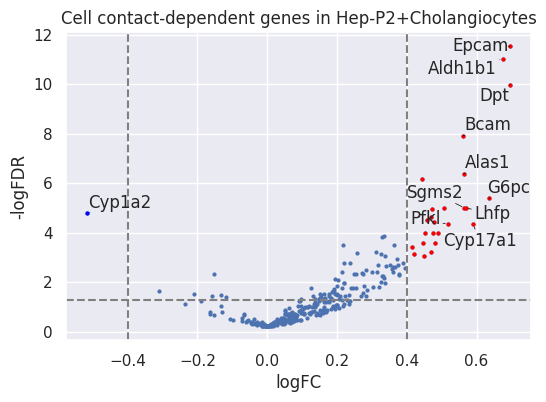

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


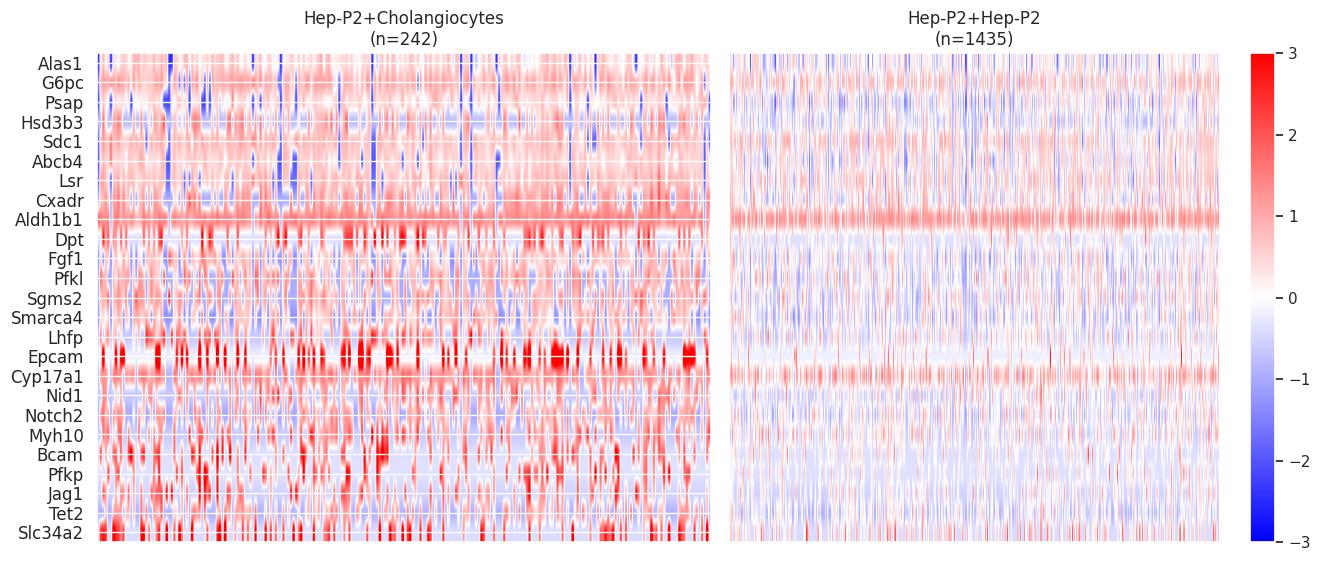

neighbor-dependent gene expression analysis:  14%|█████▍                                | 4/28 [00:03<00:31,  1.31s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


4


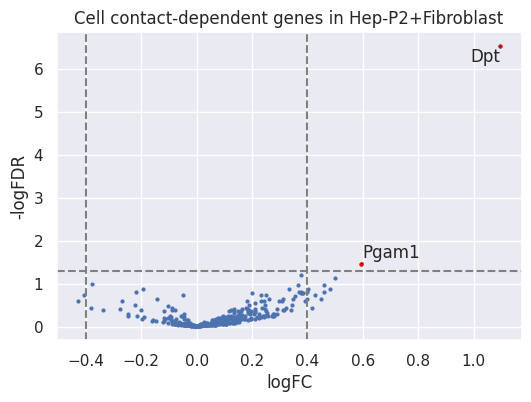

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


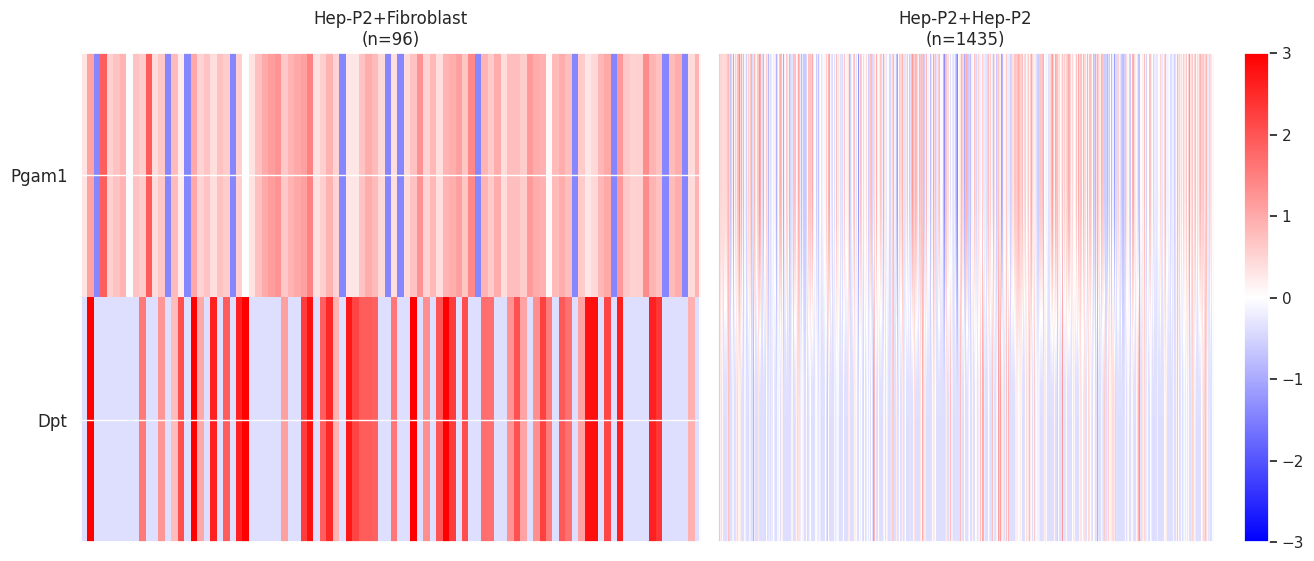

neighbor-dependent gene expression analysis:  18%|██████▊                               | 5/28 [00:05<00:30,  1.33s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


5


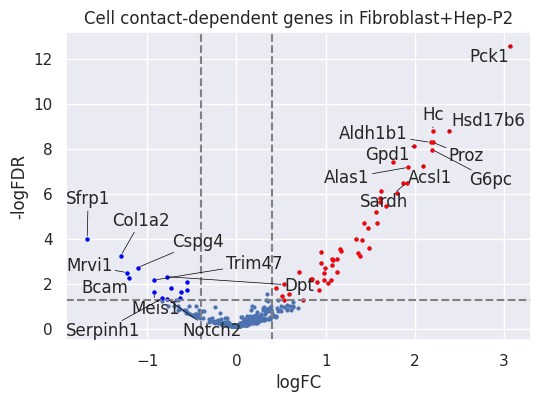

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


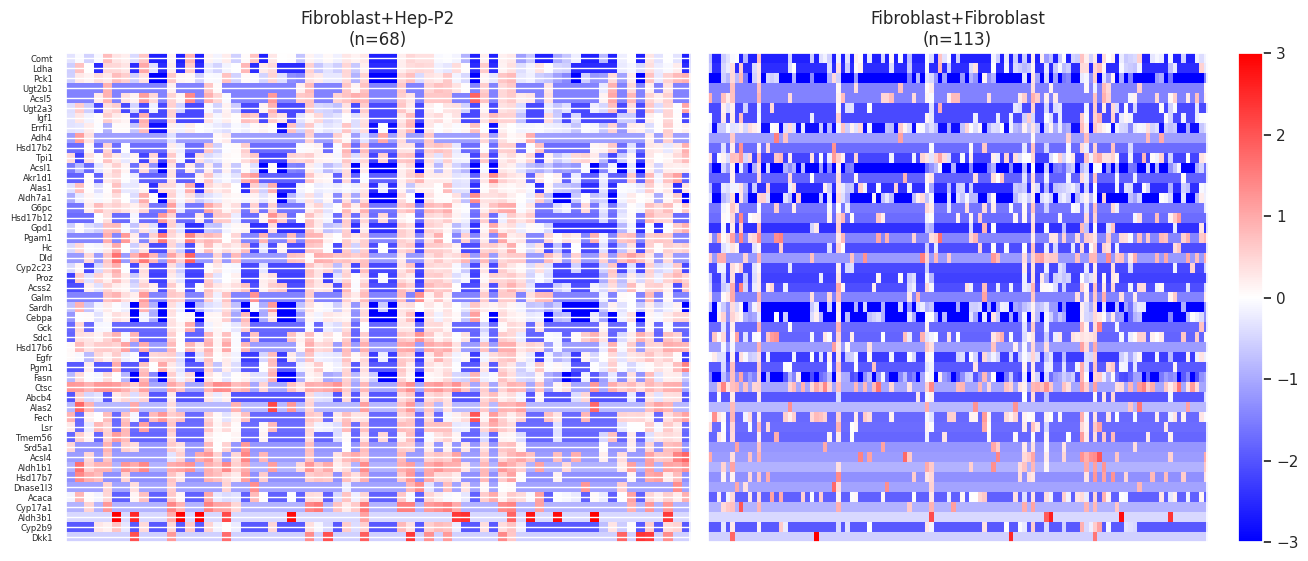

neighbor-dependent gene expression analysis:  21%|████████▏                             | 6/28 [00:09<00:49,  2.25s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


6


neighbor-dependent gene expression analysis:  25%|█████████▌                            | 7/28 [00:09<00:34,  1.64s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


7


/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fdr1'][i] = 0.0000000001


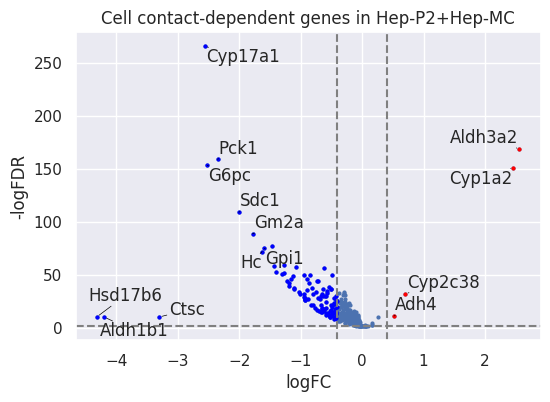

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


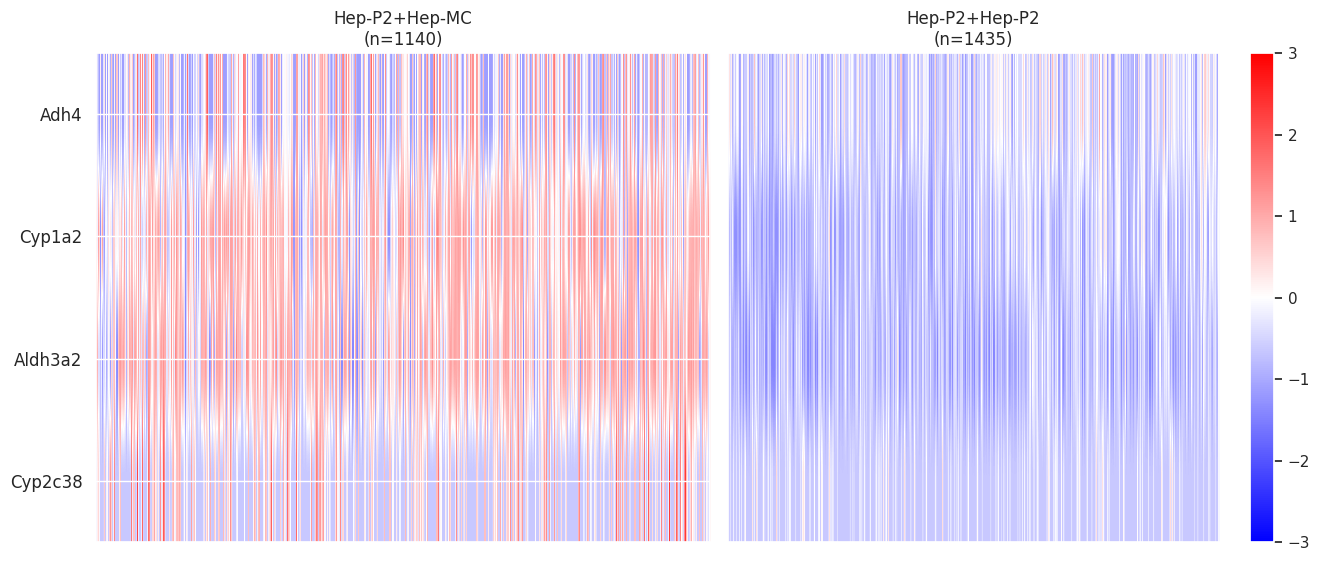

neighbor-dependent gene expression analysis:  29%|██████████▊                           | 8/28 [00:11<00:34,  1.73s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


8


neighbor-dependent gene expression analysis:  32%|████████████▏                         | 9/28 [00:12<00:25,  1.37s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


9


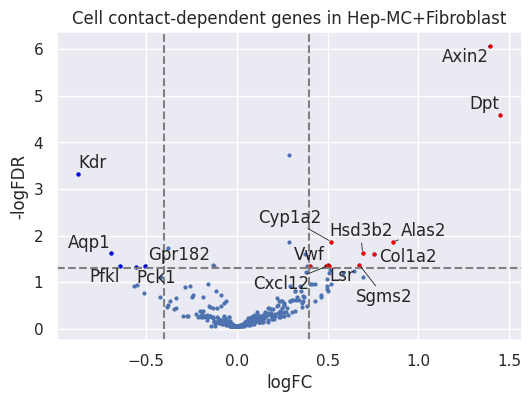

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


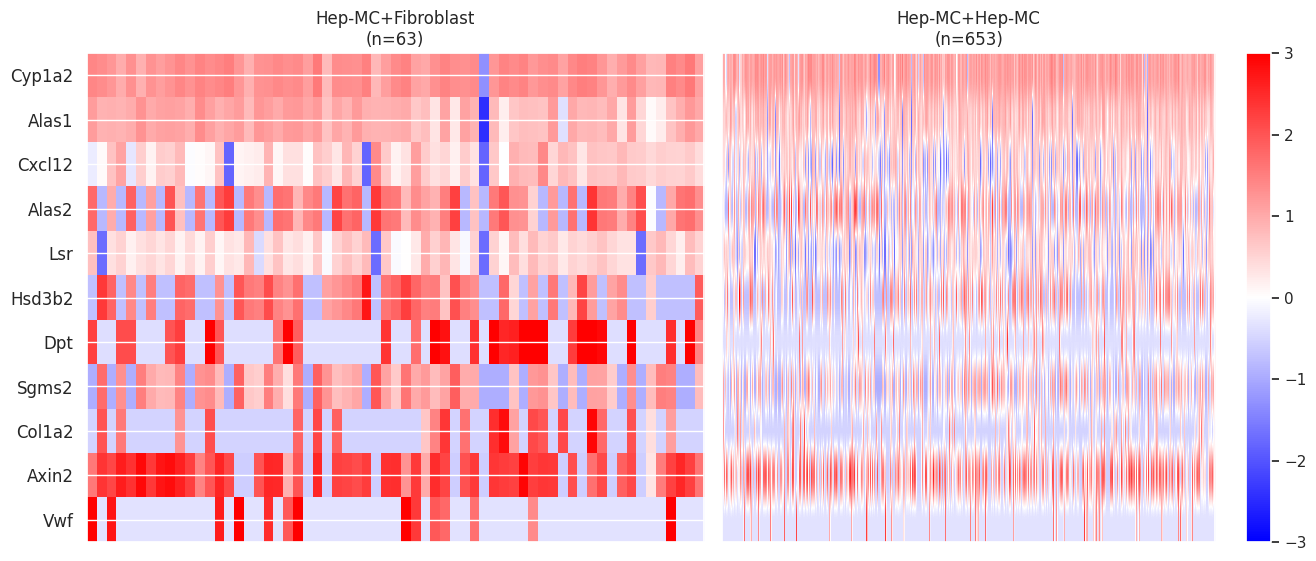

neighbor-dependent gene expression analysis:  36%|█████████████▏                       | 10/28 [00:14<00:28,  1.57s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


10


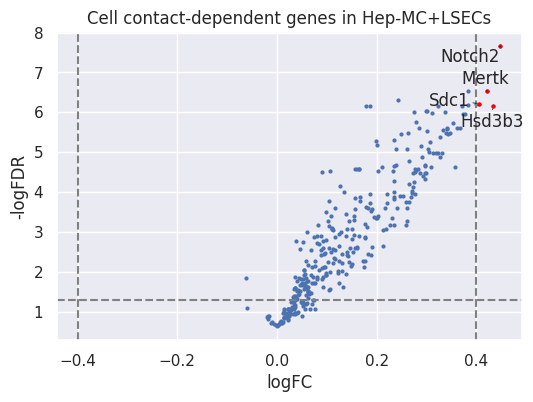

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


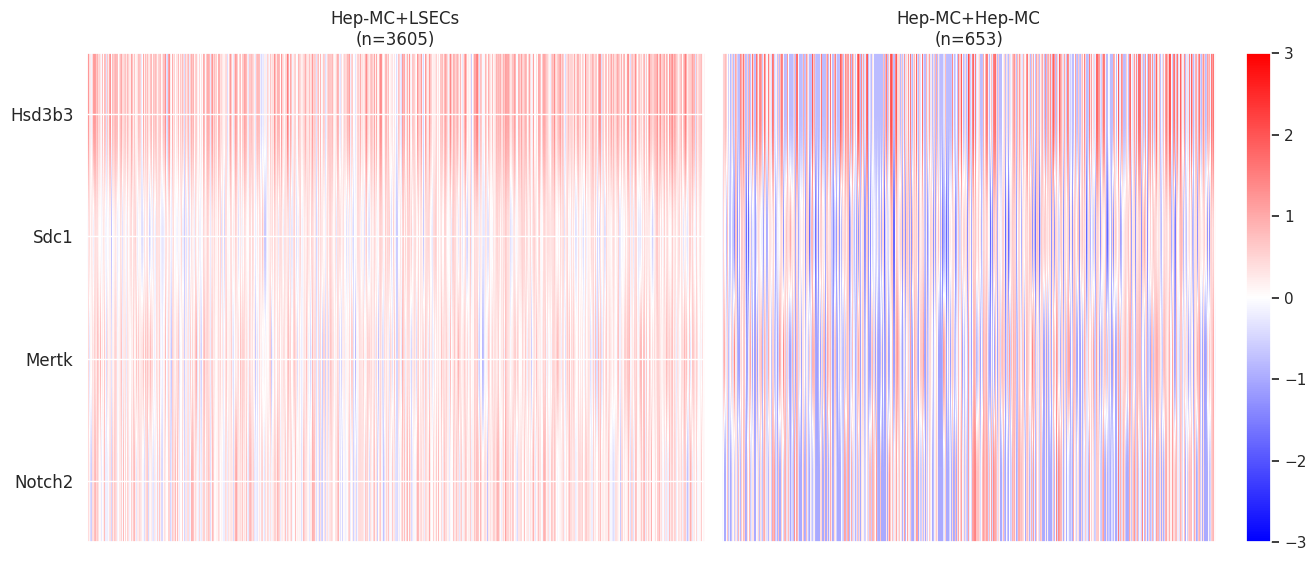

neighbor-dependent gene expression analysis:  39%|██████████████▌                      | 11/28 [00:15<00:27,  1.60s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


11


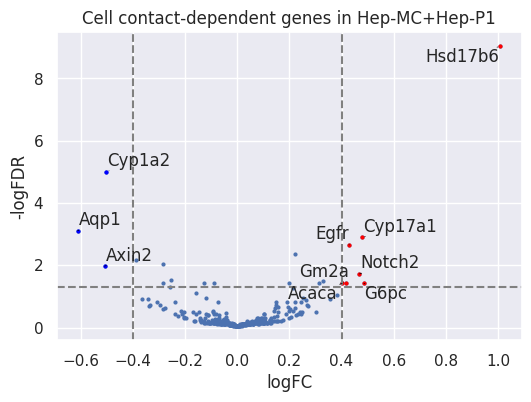

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


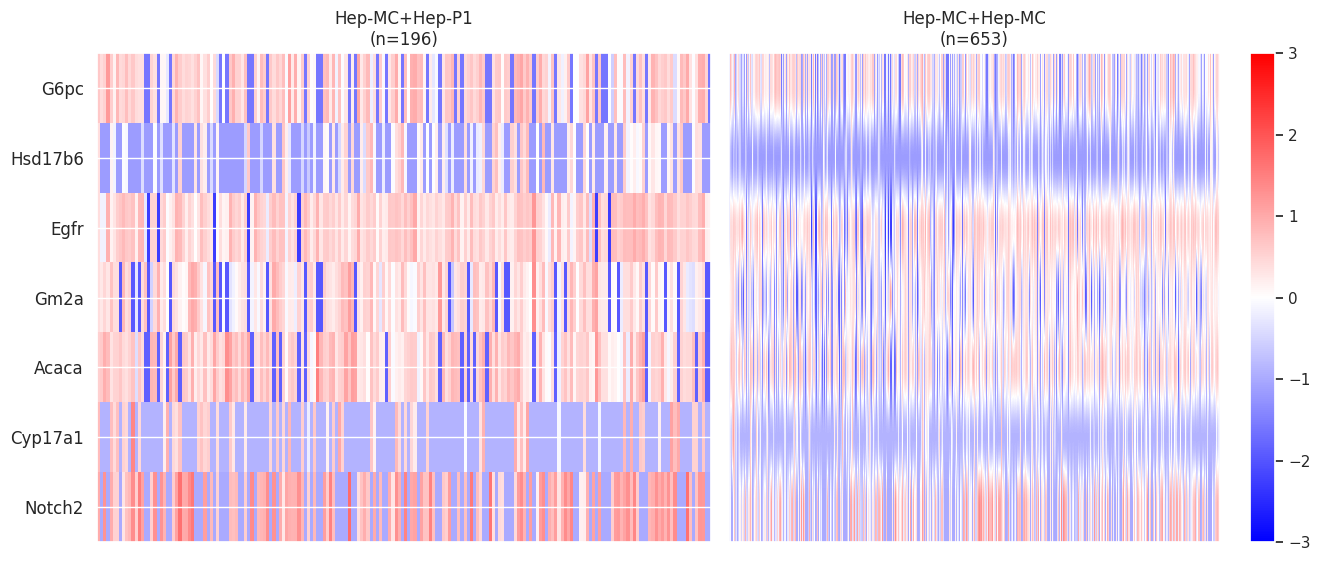

neighbor-dependent gene expression analysis:  43%|███████████████▊                     | 12/28 [00:17<00:25,  1.62s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


12


neighbor-dependent gene expression analysis:  46%|█████████████████▏                   | 13/28 [00:17<00:18,  1.24s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


13


neighbor-dependent gene expression analysis:  50%|██████████████████▌                  | 14/28 [00:18<00:13,  1.01it/s]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


14


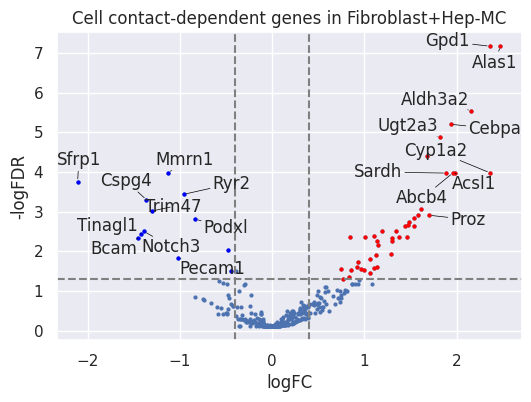

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


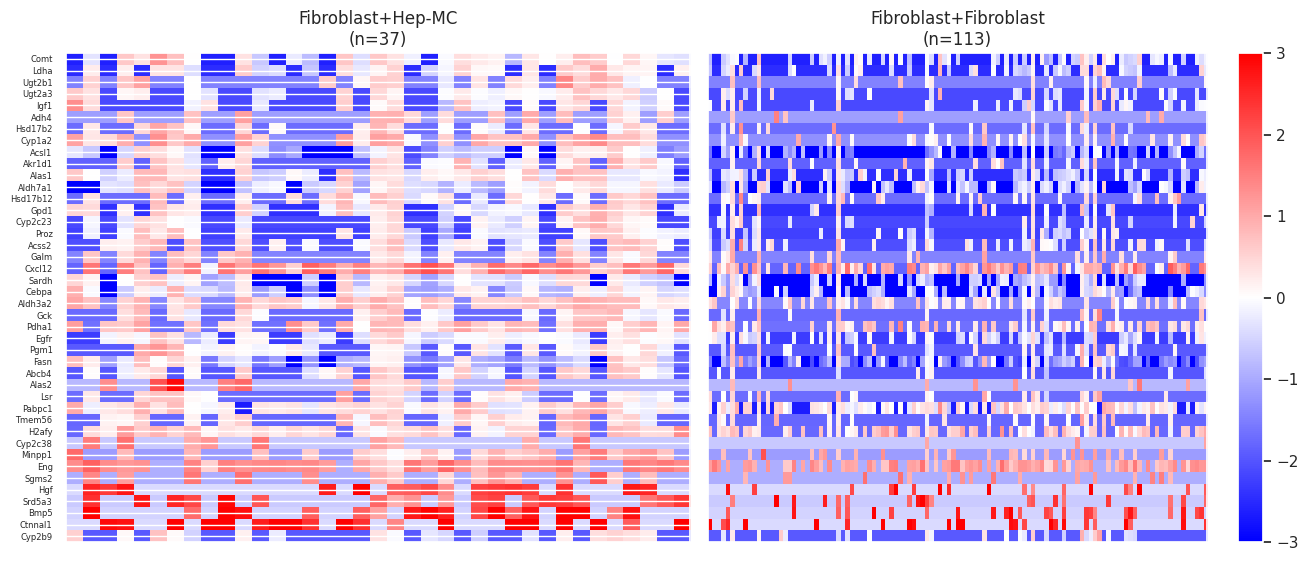

neighbor-dependent gene expression analysis:  54%|███████████████████▊                 | 15/28 [00:21<00:20,  1.56s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


15


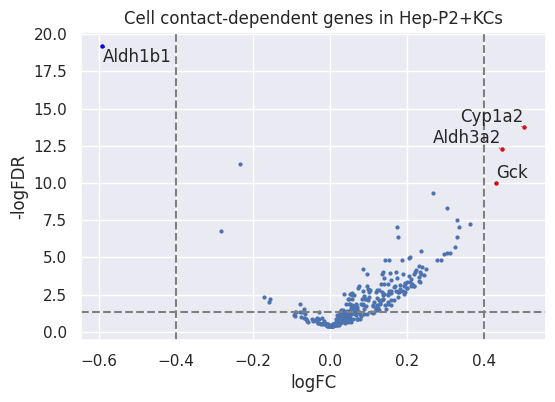

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


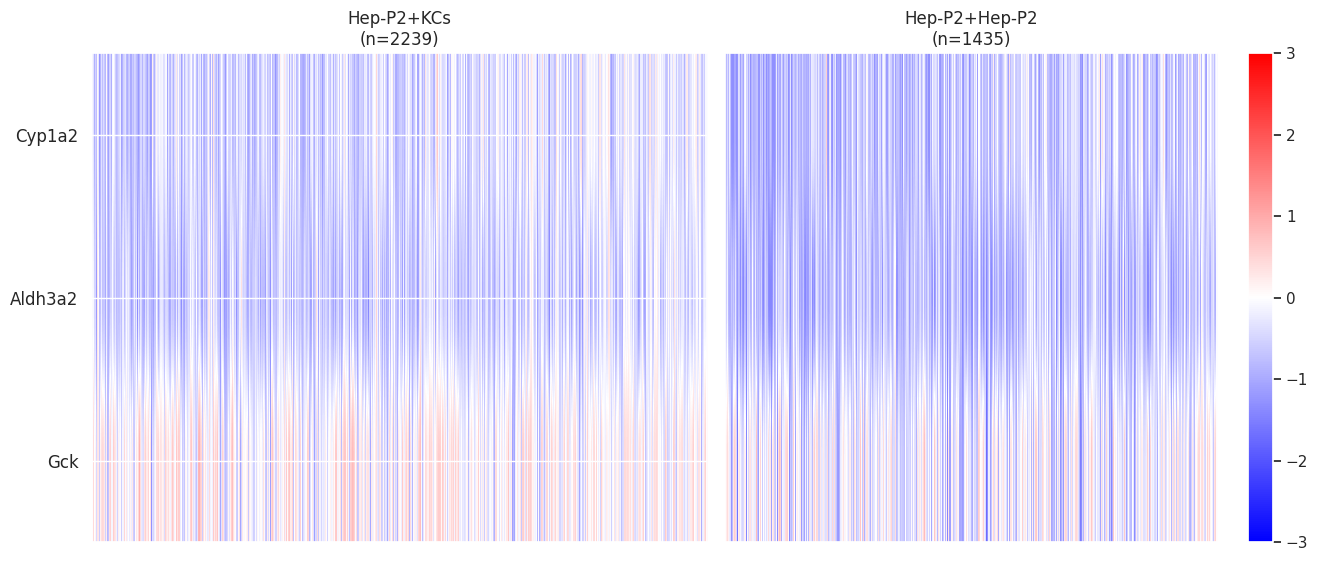

neighbor-dependent gene expression analysis:  57%|█████████████████████▏               | 16/28 [00:22<00:18,  1.58s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


16


neighbor-dependent gene expression analysis:  61%|██████████████████████▍              | 17/28 [00:23<00:13,  1.24s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


17


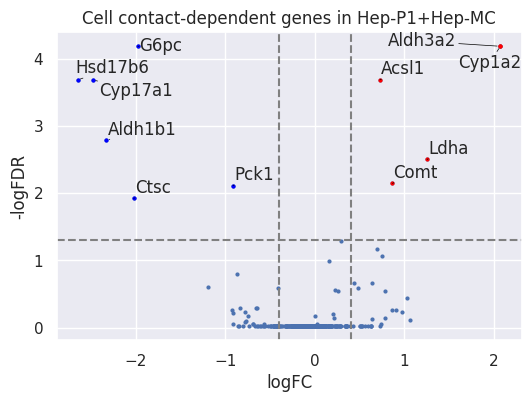

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


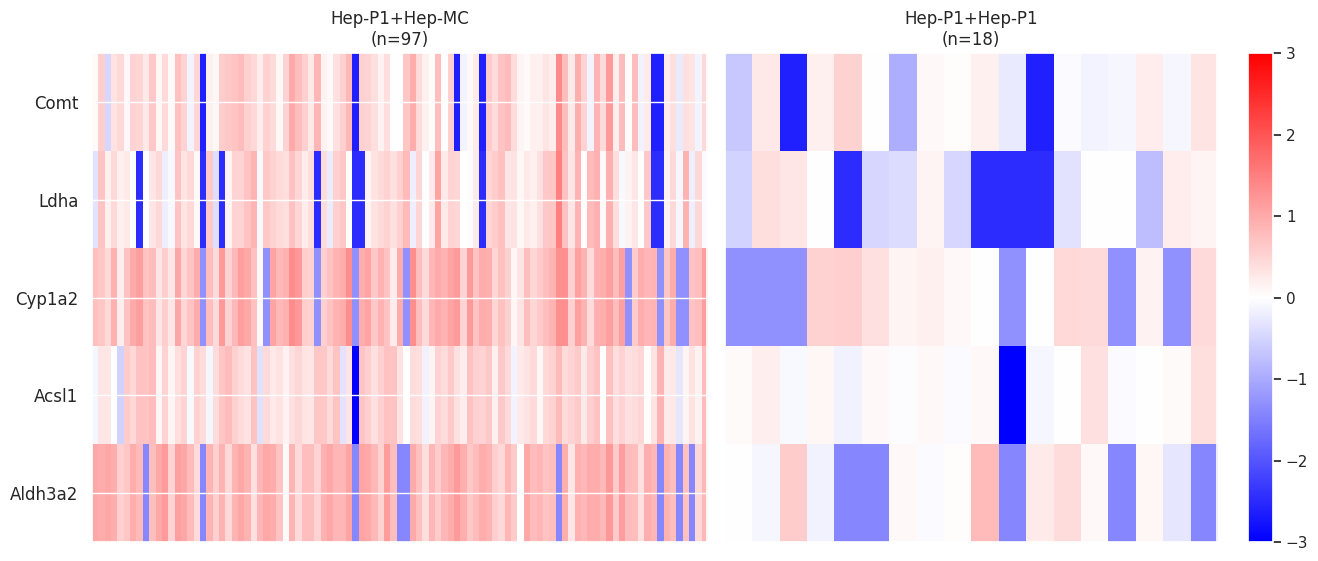

neighbor-dependent gene expression analysis:  64%|███████████████████████▊             | 18/28 [00:25<00:13,  1.39s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


18


neighbor-dependent gene expression analysis:  68%|█████████████████████████            | 19/28 [00:25<00:09,  1.09s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


19


neighbor-dependent gene expression analysis:  71%|██████████████████████████▍          | 20/28 [00:25<00:07,  1.14it/s]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


20


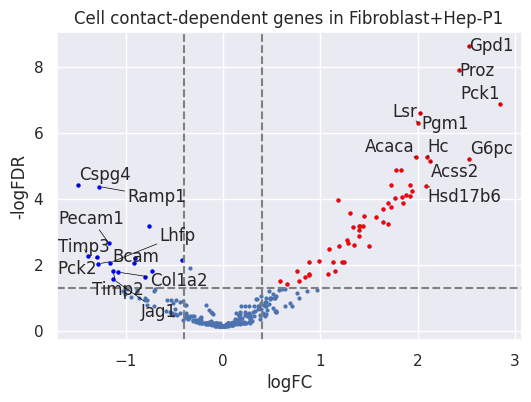

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


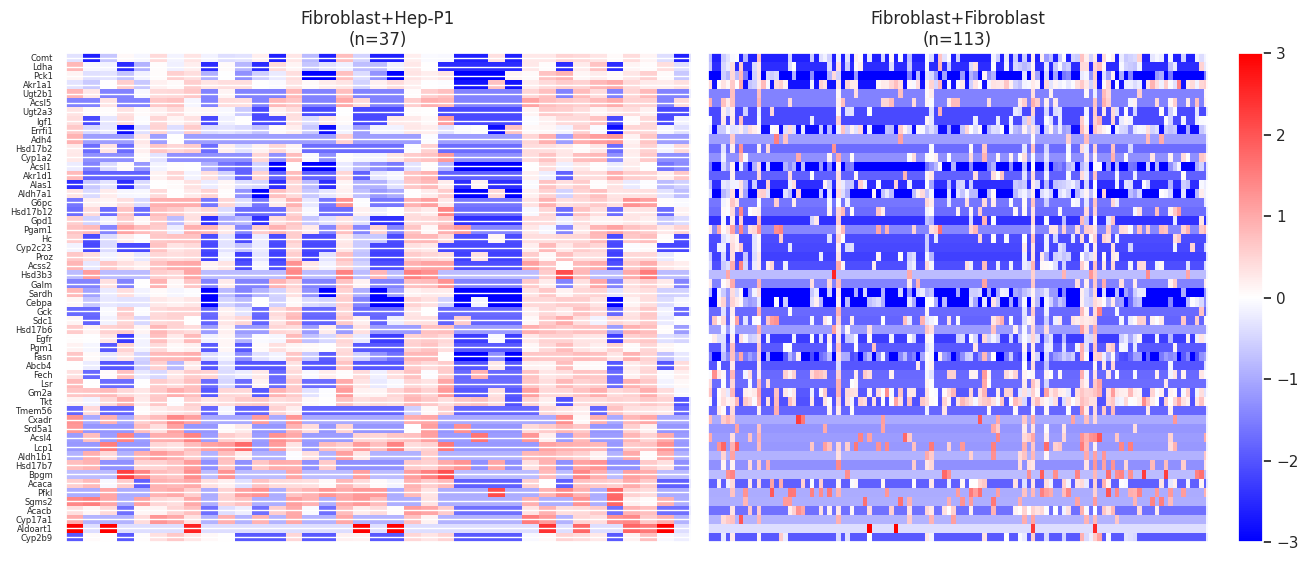

neighbor-dependent gene expression analysis:  75%|███████████████████████████▊         | 21/28 [00:28<00:09,  1.30s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


21


neighbor-dependent gene expression analysis:  79%|█████████████████████████████        | 22/28 [00:28<00:06,  1.02s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


22


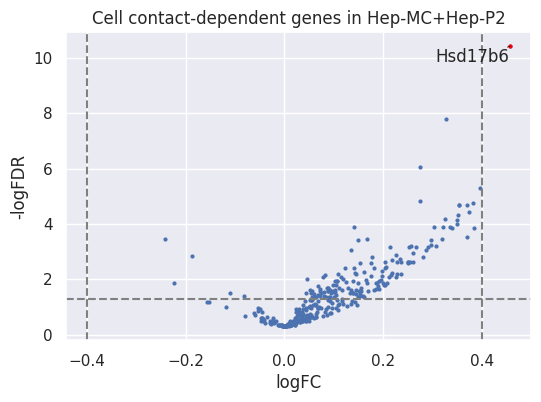

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


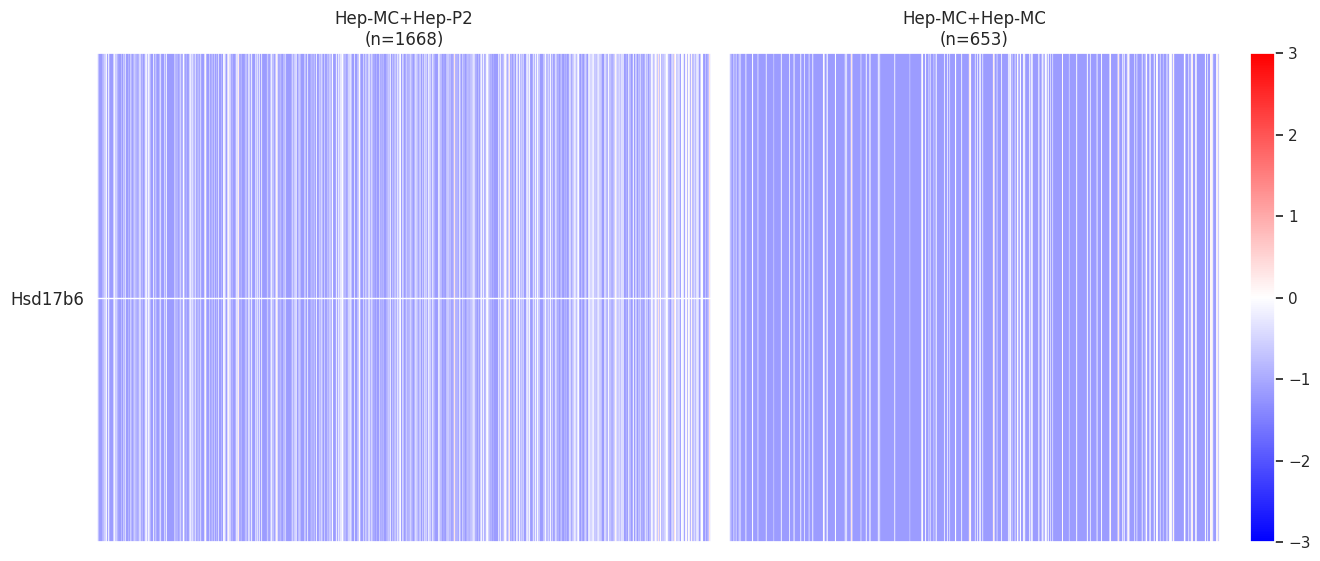

neighbor-dependent gene expression analysis:  82%|██████████████████████████████▍      | 23/28 [00:29<00:05,  1.11s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


23


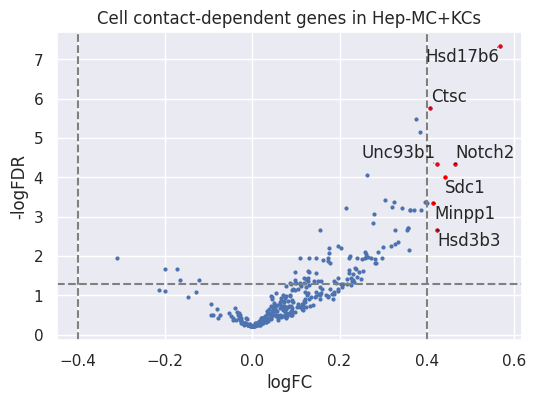

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


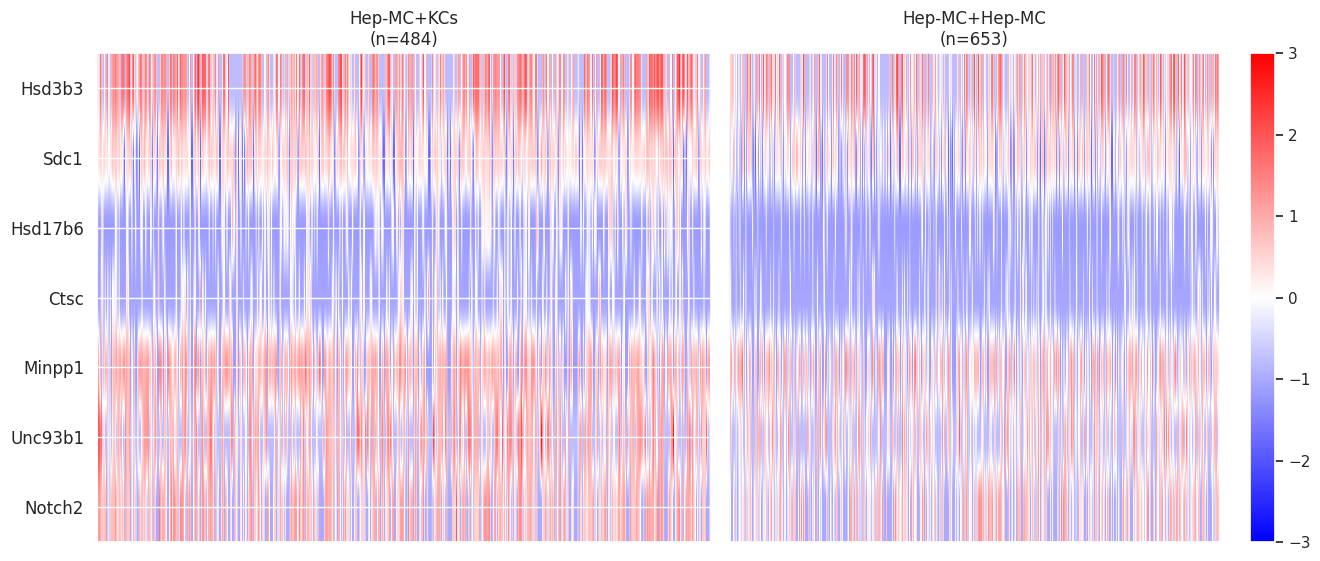

neighbor-dependent gene expression analysis:  86%|███████████████████████████████▋     | 24/28 [00:31<00:05,  1.26s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


24


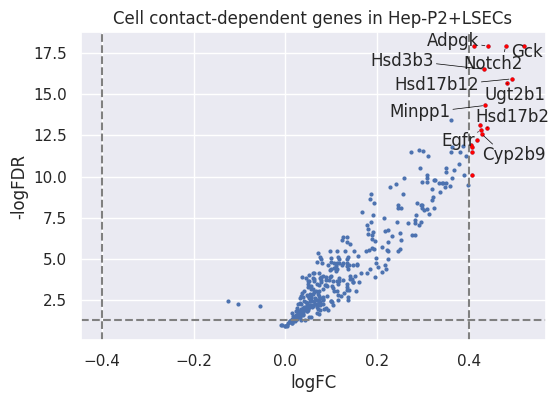

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


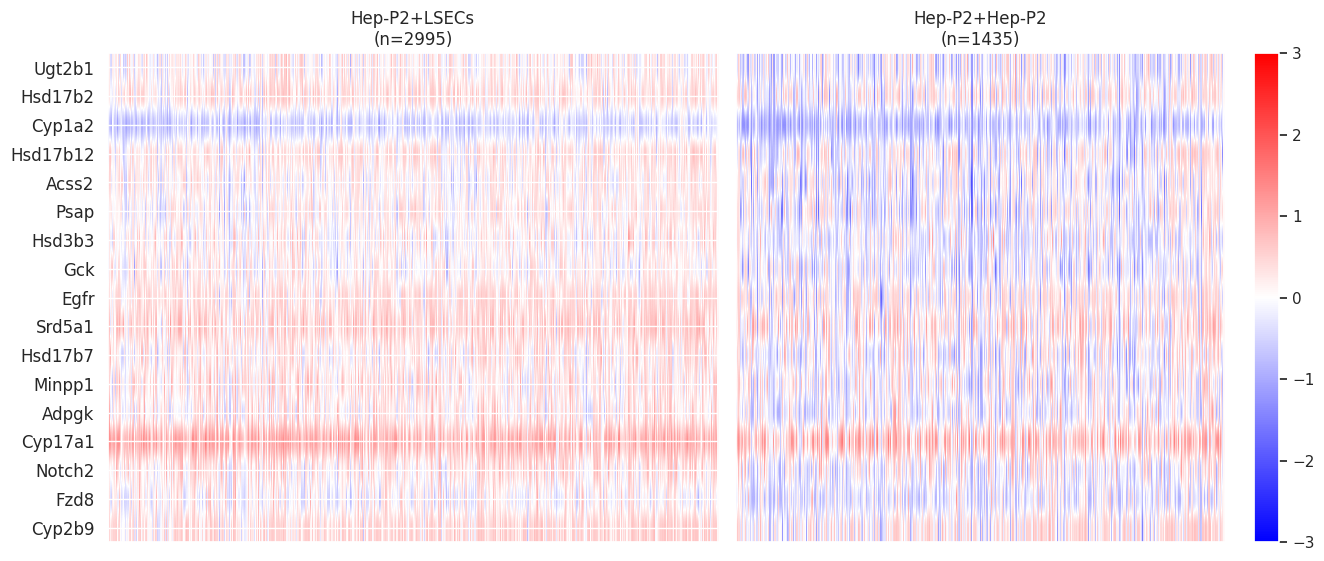

neighbor-dependent gene expression analysis:  89%|█████████████████████████████████    | 25/28 [00:35<00:06,  2.07s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


25


neighbor-dependent gene expression analysis:  93%|██████████████████████████████████▎  | 26/28 [00:35<00:03,  1.57s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


26


neighbor-dependent gene expression analysis:  96%|███████████████████████████████████▋ | 27/28 [00:36<00:01,  1.22s/it]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


27


neighbor-dependent gene expression analysis: 100%|█████████████████████████████████████| 28/28 [00:36<00:00,  1.31s/it]


In [20]:
# If save=True, all result files (DEG list: csv, heatmaps and volcano plots: pdf, gene expression values: txt) are saved in the "DE_results" folder in the root directory.
DEG_list = CellNeighborEX.DEanalysis.analyze_data(df_cell_id, df_gene_name, df_log_data, 
                                                  path_categorization, data_type, lrCutoff, 
                                                  pCutoff, pCutoff2, direction, normality_test, top_genes, save=True)

In [26]:
# Select a cell type and a DEG for spatial visualization and then load the data.
# For example, Pitx1 is up-regulated when Gut-tube are adjacent to Neural-crest.

name1='Stem-TA+Paneth_Lgr5'
name2='Paneth+Paneth_Lgr5'
name3='Stem-TA+Stem-TA_Lgr5'
gname='Lgr5'
path_selected = './DE_results/Stem-TA+Paneth/'



column_names = ['barcode', 'logdata', 'zscore']
heterotypic = pd.read_csv(path_selected + name1+".txt", delimiter=",", names = column_names)
homotypic1 = pd.read_csv(path_selected + name2+".txt", delimiter=",", names = column_names)
homotypic2 = pd.read_csv(path_selected + name3+".txt", delimiter=",", names = column_names)
heterotypic['type'] = name1
homotypic1['type'] = name2
homotypic2['type'] =name3
df_exp = pd.concat([heterotypic, homotypic1, homotypic2])



df_bg, df_red, df_blue, df_black = CellNeighborEX.visualization.set_parameters(df_processed, df_exp, beadsize_bg=5, edgecolor_bg=(0.85,0.85,0.85),
beadcolor_bg=(0.85,0.85,0.85),
beadsize_red=60, beadsize_blue=30, beadsize_black=30, 
 type_red=name1, type_blue=name2, 
 type_black=name3)


CellNeighborEX.visualization.get_spatialPlot(df_bg, df_red, df_blue, df_black, 
label_red=name1, label_blue=name2, label_black=name3,
label_gene=gname, zorder_red=3.0, zorder_blue=2.0, zorder_black=4.0, figsize=(20,28), save=True)

FileNotFoundError: [Errno 2] No such file or directory: './tuto/Gut-tube+Neural-crest_Pitx1.txt'